In [141]:
# package imports
import pandas as pd
import numpy as np
import plotly.express as pe
from pathlib import Path
import sys
import plotly.graph_objects as go
import os
import seaborn as sns
import LESO.defaultvalues as defs
import matplotlib.pyplot as plt
from LESO.experiments.analysis import (
    load_ema_leso_results,
    open_leso_experiment_file,
    quick_lcoe,
    annualized_cost
)

In [142]:
# folder rooting & defaults

# variables
exp_prefix = "evhub"
run_id = 120903

# rooting
FOLDER = Path(os.path.abspath(''))
RESULT_FOLDER = FOLDER.parent / "results"
sys.path.append(FOLDER.parent.absolute().__str__())

# constants
wind_capex = defs.wind['capex']
pv_capex = defs.pv['capex']
wind_col = "Nordex N100 2500 installed capacity"
pv_col = "PV South installed capacity"
bat_col = "2h battery installed capacity"

In [189]:
# extract data
experiments, outcomes, df = load_ema_leso_results(run_id=run_id, exp_prefix=exp_prefix, results_folder=RESULT_FOLDER)
exp = open_leso_experiment_file(RESULT_FOLDER / df.filename_export[0])
# for c in df.columns:
#     print(c)
df.return_on_investment.max()

-0.005907667409650881

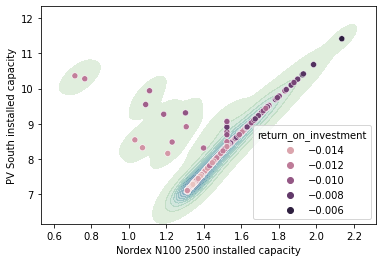

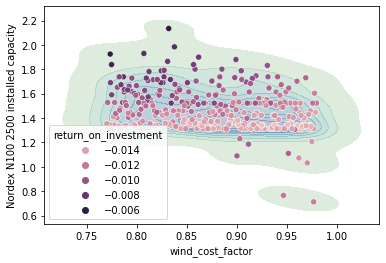

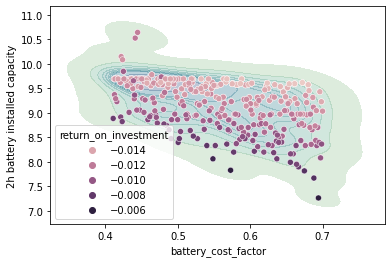

In [187]:
# KDE scatters

def scatter_kde(x, y, hue):
    fig = plt.figure()
    sns.kdeplot(
        data=df, x=x, y=y,
        fill=True, levels=10, thresh=0.01, cmap="crest", alpha=0.3
    )
    sns.scatterplot(
        data=df, x=x, y=y,
        hue=hue
    )
# PV
scatter_kde(
    x = wind_col,
    y = pv_col,
    hue = 'return_on_investment'
)
# wind
scatter_kde(
    x = "wind_cost_factor",
    y = wind_col,
    hue = 'return_on_investment'
)
# battery
scatter_kde(
    x = "battery_cost_factor",
    y = bat_col,
    hue = 'return_on_investment'
)

In [183]:
fig = pe.scatter(
    df,
    x="pv_cost_factor",
    y="wind_cost_factor",
    color="curtailment",
    size=[20]*len(df),
    opacity=0.6,
    color_continuous_scale='algae_r'
)
fig.update_layout(template="simple_white")
fig.show()
fig.update_xaxes(
    title="<b>PV cost factor</b>"
)
fig.update_yaxes(
   title= "<b>Wind cost factor</b>"
)

fig = pe.scatter(
    df,
    x="pv_cost_factor",
    y="battery_cost_factor",
    color="curtailment",
    size=[20]*len(df),
    opacity=0.6,
    color_continuous_scale='algae_r'
)
fig.update_layout(template="simple_white")
fig.show()


In [165]:


## PV
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df["pv_cost_factor"]*pv_capex,
    y=df[pv_col],
    mode="markers",
))
fig.update_layout(template="simple_white")
fig.update_yaxes(
    ticksuffix = " MW",
    title="<b>Additional installed capacity of PV</b>"
)
fig.update_xaxes(
    ticksuffix = " €/kWp",
    title= "<b>Cost price of PV</b>"
)
fig.show()

## Wind
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df["wind_cost_factor"]*wind_capex,
    y=df[wind_col],
    mode="markers",
))

fig.update_layout(template="simple_white")
fig.update_yaxes(
    ticksuffix = " MW",
    title="<b>Additional installed capacity of Wind</b>"
)
fig.update_xaxes(
    ticksuffix = " €/kWp",
    title= "<b>Cost price of wind</b>"
)
fig.show()

## Battery
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df["battery_cost_factor"],
    y=df[bat_col],
    mode="markers",
))

fig.update_layout(template="simple_white")
fig.update_yaxes(
    ticksuffix = " MW",
    title="<b>Additional installed capacity of battery</b>"
)
fig.update_xaxes(
    ticksuffix = " €/kWp",
    title= "<b>Cost price of battery</b>"
)
fig.show()

## PV vs. Battery
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df[bat_col],
    y=df[pv_col],
    mode="markers",
))

fig.update_layout(template="simple_white")
fig.update_xaxes(
    ticksuffix = " MW",
    title="<b>Installed capacity of battery</b>"
)
fig.update_yaxes(
    ticksuffix = " MW",
    title="<b>Installed capacity of PV</b>"
)

fig.show()

## Wind vs. Battery
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df[bat_col],
    y=df[wind_col],
    mode="markers",
))

fig.update_layout(template="simple_white")
fig.update_xaxes(
    ticksuffix = " MW",
    title="<b>Installed capacity of battery</b>"
)
fig.update_yaxes(
    ticksuffix = " MW",
    title="<b>Installed capacity of wind</b>"
)

fig.show()

## Wind vs. PV
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df[wind_col],
    y=df[pv_col],
    mode="markers",
))

fig.update_layout(template="simple_white")
fig.update_xaxes(
    ticksuffix = " MW",
    title="<b>Installed capacity of wind</b>"
)
fig.update_yaxes(
    ticksuffix = " MW",
    title="<b>Installed capacity of solar</b>"
)

fig.show()